#  Введение в 🤗 Transformers

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:

* https://huggingface.co/docs/transformers/v4.38.2/en/pipeline_tutorial
* https://huggingface.co/docs/transformers/v4.38.2/en/main_classes/pipelines#transformers.AutomaticSpeechRecognitionPipeline
* https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fstackoverflow.com%2Fa%2F51506028
* https://stackoverflow.com/questions/37435369/how-to-draw-a-rectangle-on-image
* https://huggingface.co/docs/transformers/v4.38.2/en/autoclass_tutorial#autoimageprocessor
* https://huggingface.co/docs/transformers/v4.38.2/en/model_doc/auto#transformers.AutoModelForObjectDetection
* https://huggingface.co/docs/transformers/training
* https://huggingface.co/docs/datasets/main/en/repository_structure
* https://huggingface.co/docs/datasets/main/en/package_reference/loading_methods#datasets.load_dataset
* https://huggingface.co/docs/transformers/v4.35.2/en/training#prepare-a-dataset
* https://huggingface.co/docs/datasets/process
* https://huggingface.co/docs/evaluate/index
* https://huggingface.co/docs/transformers/main_classes/trainer
* https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/trainer#transformers.TrainingArguments

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1</p>

## Задачи для совместного разбора

In [ ]:
!pip install datasets evaluate accelerate

1\. Обсудите основные возможности и экосистему пакета Transformers 🤗 на примере задачи поиска ответа на вопрос в тексте.

In [50]:
from transformers import pipeline
import numpy as np

In [51]:
text = '''
The debate between cats and dogs has raged on for centuries, dividing pet lovers into passionate camps.
Cats, with their independent nature and mysterious charm, appeal to those seeking companionship without constant demands.
Dogs, on the other hand, offer unwavering loyalty and boundless enthusiasm, making them beloved companions
for those craving constant affection and activity.
'''

In [52]:
question = 'Why do cats attract attention?'

In [53]:
model_id = 'distilbert/distilbert-base-cased-distilled-squad'
answerer_pipeline = pipeline('question-answering', model=model_id)

In [54]:
answerer_pipeline(
    question=question,
    context=text
)

{'score': 0.2590688467025757,
 'start': 116,
 'end': 161,
 'answer': 'their independent nature and mysterious charm'}

In [55]:
answerer_pipeline.tokenizer.__class__.__name__

'DistilBertTokenizerFast'

In [56]:
answerer_pipeline.model.__class__.__name__

'DistilBertForQuestionAnswering'

In [57]:
from transformers import DistilBertTokenizerFast, DistilBertForQuestionAnswering
from transformers import AutoModel, AutoTokenizer, AutoModelForQuestionAnswering

In [58]:
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForQuestionAnswering.from_pretrained(model_id)

In [59]:
tokenizer.__class__.__name__

'DistilBertTokenizerFast'

In [60]:
inputs = tokenizer(question, text, return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  2009,  1202, 11771,  9781,  2209,   136,   102,  1109,  5655,
          1206, 11771,  1105,  6363,  1144,  8045,  1181,  1113,  1111,  3944,
           117, 18699, 11109, 12977,  1154, 14472,  7869,   119, 17408,   117,
          1114,  1147,  2457,  2731,  1105,  8198, 11967,   117,  5767,  1106,
          1343,  5788, 12994,  3157,  1443,  4836,  7252,   119, 16406,   117,
          1113,  1103,  1168,  1289,   117,  2906,  8362, 17159,  3384, 10075,
          1105,  4930,  2008, 12430,   117,  1543,  1172, 12915, 12994,  1111,
          1343,   172,  1611,  3970,  4836, 12721,  1105,  3246,   119,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])}

In [61]:
outputs = model(**inputs)
outputs

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ -7.3466,  -8.4334, -10.1661, -10.2327,  -9.8446, -10.4487,  -8.8612,
          -8.5093,  -4.6390,  -5.1207,  -8.7647,  -6.4860, -10.0330,  -7.8754,
          -8.7065,  -8.2367, -10.4912,  -9.7546,  -9.5640,  -9.4665,  -9.1847,
          -6.0775,  -5.7577,  -8.1511,  -9.5241,  -6.0960,  -7.9140,  -6.8508,
          -0.5974,  -4.7046,   0.0829,   2.2341,   2.0374,  -2.5162,  -5.2183,
           0.9769,  -1.5514,  -4.6186,  -1.5886,  -5.4501,  -1.6530,  -1.5503,
          -1.4312,  -6.4117,  -1.0940,  -3.0208,  -4.6920,  -6.1496,  -1.3536,
          -9.0775,  -7.7131,  -9.4301,  -9.7439, -10.1375,  -6.0933,  -2.8406,
          -2.0197,  -7.4151,  -7.5488,  -2.3198,  -8.0172,  -3.6072,  -8.1854,
          -4.1657,  -7.2482,  -2.6937,  -6.5313,  -4.6578,  -6.8350,  -5.5111,
          -3.7698,  -3.4284,  -8.7686,  -7.9149,  -3.7951,  -4.7180,  -9.9935,
          -6.3157,  -8.4364,  -8.5093]], grad_fn=<CloneBackward0>), end_logits

In [62]:
outputs

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ -7.3466,  -8.4334, -10.1661, -10.2327,  -9.8446, -10.4487,  -8.8612,
          -8.5093,  -4.6390,  -5.1207,  -8.7647,  -6.4860, -10.0330,  -7.8754,
          -8.7065,  -8.2367, -10.4912,  -9.7546,  -9.5640,  -9.4665,  -9.1847,
          -6.0775,  -5.7577,  -8.1511,  -9.5241,  -6.0960,  -7.9140,  -6.8508,
          -0.5974,  -4.7046,   0.0829,   2.2341,   2.0374,  -2.5162,  -5.2183,
           0.9769,  -1.5514,  -4.6186,  -1.5886,  -5.4501,  -1.6530,  -1.5503,
          -1.4312,  -6.4117,  -1.0940,  -3.0208,  -4.6920,  -6.1496,  -1.3536,
          -9.0775,  -7.7131,  -9.4301,  -9.7439, -10.1375,  -6.0933,  -2.8406,
          -2.0197,  -7.4151,  -7.5488,  -2.3198,  -8.0172,  -3.6072,  -8.1854,
          -4.1657,  -7.2482,  -2.6937,  -6.5313,  -4.6578,  -6.8350,  -5.5111,
          -3.7698,  -3.4284,  -8.7686,  -7.9149,  -3.7951,  -4.7180,  -9.9935,
          -6.3157,  -8.4364,  -8.5093]], grad_fn=<CloneBackward0>), end_logits

In [63]:
outputs.start_logits.argmax(), outputs.end_logits.argmax()

(tensor(31), tensor(36))

In [64]:
inputs['input_ids'][0, 31:36+1]

tensor([ 1147,  2457,  2731,  1105,  8198, 11967])

In [65]:
tokenizer.decode(inputs['input_ids'][0, 31:36+1])

'their independent nature and mysterious charm'

2\. Обсудите основные шаги по дообучению моделей из экосистемы Transformers 🤗

In [87]:
from datasets import load_dataset

In [88]:
dataset = load_dataset('dair-ai/emotion')

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [89]:
np.unique(dataset['train'][:]['label'])

array([0, 1, 2, 3, 4, 5])

In [90]:
dataset['train'][0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [91]:
model_id = 'blanchefort/rubert-base-cased-sentiment-rusentiment'

In [92]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_id)

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length',
                     truncation=True, max_length=16)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [93]:
tokenized_datasets['train'][0]

{'text': 'i didnt feel humiliated',
 'label': 0,
 'input_ids': [101,
  248,
  89104,
  271,
  74994,
  60528,
  14296,
  16035,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]}

In [94]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    num_labels=6,
    ignore_mismatched_sizes=True
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at blanchefort/rubert-base-cased-sentiment-rusentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [95]:
from transformers import TrainingArguments
import numpy as np
import evaluate
from transformers import TrainingArguments, Trainer

In [96]:
metric = evaluate.load('accuracy')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    num_train_epochs=5,
    output_dir='test_trainer',
    evaluation_strategy='epoch',
    save_steps=5000,
)

In [97]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [98]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.597000,1.598974,0.275000
2,1.587500,1.580444,0.352000
3,1.589800,1.585966,0.352000
4,1.560400,1.586320,0.275000
5,1.581600,1.581600,0.352000


TrainOutput(global_step=10000, training_loss=1.58384111328125, metrics={'train_runtime': 1120.1571, 'train_samples_per_second': 71.419, 'train_steps_per_second': 8.927, 'total_flos': 657801262080000.0, 'train_loss': 1.58384111328125, 'epoch': 5.0})

## Задачи для самостоятельного решения

1\. Запишите небольшой аудиофрагмент в формате wav на русском языке. Для записи вы можете воспользоваться любым устройством: мобильным телефоном, веб-приложением (например, [этим](https://vocalremover.org/ru/voice-recorder)) и т.д. Если нет возможности записать аудио, можете найти любую запись на русском языке в интернете.

Среди предобученных моделей найдите модель для автоматического распознавания текста на русском языке. Протестируйте данную модель вашей аудиозаписи, используя `transformers.pipeline`. Выведите результаты работы на экран.

In [30]:
model_id = 'openai/whisper-tiny'
answerer_pipeline = pipeline(
    'automatic-speech-recognition', model=model_id, return_timestamps='word'
)

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [31]:
answ = answerer_pipeline(inputs='/content/recognition_test.wav')
answ['text'].strip()

Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
WhisperModel is using WhisperSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `layer_head_mask` not None. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


'Онлайн диктор для синтезоречи, обеспечит вам возможность преобразовать текст в убедительную аудиодорожку.'

2\. `transformers.pipeline` позволяет передавать дополнительные, специфичные для решаемой задачи, аргументы. В случае распознавания текста из аудио мы можем попросить `pipeline` вернуть время произнесения каждого из токенов (звука или слова). Создайте `pipeline` таким образом, чтобы вместе с результатом возвращалось время произнесения каждого слова. Выведите результат на экран.

Визуализируйте распознанные слова, адаптировав [этот пример](https://stackoverflow.com/a/51506028). Для этого сначала найдите множество уникальных слов, которые были произнесены, и присвойте каждому из них номер и собственный цвет.

In [32]:
import matplotlib
import matplotlib.pyplot as plt

In [33]:
answ['chunks']

[{'text': ' Онлайн', 'timestamp': (0.12, 0.66)},
 {'text': ' диктор', 'timestamp': (0.66, 1.02)},
 {'text': ' для', 'timestamp': (1.02, 1.26)},
 {'text': ' синтезоречи,', 'timestamp': (1.26, 2.46)},
 {'text': ' обеспечит', 'timestamp': (2.46, 2.96)},
 {'text': ' вам', 'timestamp': (2.96, 3.12)},
 {'text': ' возможность', 'timestamp': (3.12, 3.62)},
 {'text': ' преобразовать', 'timestamp': (3.62, 4.44)},
 {'text': ' текст', 'timestamp': (4.44, 4.72)},
 {'text': ' в', 'timestamp': (4.72, 4.92)},
 {'text': ' убедительную', 'timestamp': (4.92, 5.52)},
 {'text': ' аудиодорожку.', 'timestamp': (5.52, 8.58)}]

In [34]:
step = 20

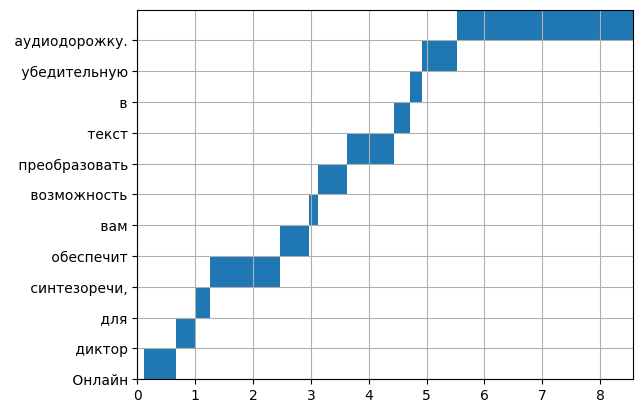

In [35]:
text = [i['text'] for i in answ['chunks']]

fig, ax = plt.subplots()
for n, i in enumerate(answ['chunks']):
    ax.add_patch(matplotlib.patches.Rectangle(
        (i['timestamp'][0], n*step), i['timestamp'][1]-i['timestamp'][0], step
        )
    )

plt.xlim(0, answ['chunks'][-1]['timestamp'][1])
plt.ylim(0, len(answ['chunks'])*step)
plt.yticks(np.arange(0, len(answ['chunks'])*step, step), [i['text'] for i in answ['chunks']])
plt.grid(True)
plt.show()

3\. Разбейте данные из файла `reviews_polarity_small.csv` на обучающее и валидационное множество в соотношении 80 на 20. Создайте папку `reviews_polarity_dataset` и сохраните в нее полученные фрагменты данных под названием `train.csv` и `test.csv`. Создайте объект `datasets.Dataset`, используя функцию `load_dataset`.

Токенизируйте строки при помощи токенизатора, соответствующего модели `rubert-base-cased-sentiment`. Удалите из датасета поле `text` после токенизации, замените поле `class` на `labels` и приведите данные к тензорам `torch`.

In [36]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
import pandas as pd
import torch
import os

In [37]:
df = pd.read_csv('/content/reviews_polarity_small.csv').rename(columns={'class': 'label'})
df.head()

,text,label
0,Большой выбор. Есть кассы самообслуживания что...,1
1,"Постоянно там бываю, очень вежливые люди , хот...",1
2,"Не самая удобная Пятёрочка, всегда большие оче...",0
3,"Заезжаю когда еду на даче , всегда есть то что...",1
4,Очередь большая,0


In [38]:
ix = np.arange(df.shape[0])
np.random.shuffle(ix)

In [39]:
threshold = int(0.8*df.shape[0])
df_train, df_test = df.iloc[ix][:threshold], df.iloc[ix][threshold:]
df_train.shape, df_test.shape

((1600, 2), (400, 2))

In [40]:
fdir = 'reviews_polarity_dataset'
if fdir not in os.listdir():
    os.mkdir(fdir)

In [41]:
df_train.to_csv(fdir + '/' + 'train.csv', index=False)
df_test.to_csv(fdir + '/' + 'test.csv', index=False)

In [42]:
dataset = load_dataset(fdir + '/')
dataset

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [43]:
dataset['train'][0]

{'text': 'Постоянный клиент .', 'label': 1}

4\. Создайте модель при помощи класса `AutoModelForSequenceClassification`, заменив голову модели в соответствии с задачей бинарной классификации. Используя `transformers.Trainer`, настройте модель для решения задачи бинарной классификации. При настройке `Trainer` укажите количество эпох, равное 5. Во время обучения выводите на экран значение функции потерь на обучающем множестве и f1 на валидационном множестве.  

In [44]:
dataset['train'][0]

{'text': 'Постоянный клиент .', 'label': 1}

In [45]:
model_id = 'blanchefort/rubert-base-cased-sentiment-rusentiment'

In [46]:
tokenizer = AutoTokenizer.from_pretrained(model_id)

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length',
                     truncation=True, max_length=32)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [47]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    num_labels=2,
    ignore_mismatched_sizes=True
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at blanchefort/rubert-base-cased-sentiment-rusentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
from transformers import TrainingArguments
import numpy as np
import evaluate
from transformers import TrainingArguments, Trainer

metric = evaluate.load('accuracy')  # используйте метрику f1

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    num_train_epochs=5,
    output_dir='test_trainer',
    evaluation_strategy='epoch',
    save_steps=5000,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [49]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.391699,0.837500
2,No log,0.500257,0.865000
3,0.288800,0.636372,0.855000
4,0.288800,0.666878,0.860000
5,0.104700,0.697626,0.860000


TrainOutput(global_step=1000, training_loss=0.19673220443725586, metrics={'train_runtime': 141.6288, 'train_samples_per_second': 56.486, 'train_steps_per_second': 7.061, 'total_flos': 131555527680000.0, 'train_loss': 0.19673220443725586, 'epoch': 5.0})